**Import Required Libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

**Load The Dataset & Print The Values**

In [3]:
df = pd.read_csv("scores_data.csv")
print('First 5 Rows\n:',df.head()) 
print('Last 5 Rows\n:',df.tail()) 
print('Rows and Columns Size\t:',df.shape) 

First 5 Rows
:        Batch  User_ID     Score   
0  AI_ELITE_7  uid_149       6 / 7
1  AI_ELITE_7  uid_148       6 / 7
2  AI_ELITE_7  uid_147       7 / 7
3  AI_ELITE_7  uid_146       7 / 7
4  AI_ELITE_7  uid_145       4 / 7
Last 5 Rows
:          Batch  User_ID     Score   
144  AI_ELITE_4    uid_5       4 / 7
145  AI_ELITE_4    uid_4       4 / 7
146  AI_ELITE_4    uid_3       4 / 7
147  AI_ELITE_4    uid_2       3 / 7
148  AI_ELITE_4    uid_1       2 / 7
Rows and Columns Size	: (149, 3)


In [4]:
df.columns = df.columns.str.strip()
print(df.columns)
df["Score"] = df["Score"].astype(str).str.split("/").str[0].astype(int)
df.info()

Index(['Batch', 'User_ID', 'Score'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Batch    149 non-null    object
 1   User_ID  149 non-null    object
 2   Score    149 non-null    int32 
dtypes: int32(1), object(2)
memory usage: 3.0+ KB


**Check Unique Batches**

In [5]:
print(df["Batch"].unique())

['AI_ELITE_7' 'AI_ELITE_6' 'AI_ELITE_4']


**Basic Statistics Per Batch**

In [6]:
batch_stats = df.groupby("Batch")["Score"].describe()
print(batch_stats)

            count      mean       std  min  25%  50%   75%  max
Batch                                                          
AI_ELITE_4   48.0  3.791667  1.443376  0.0  3.0  4.0  4.25  7.0
AI_ELITE_6   48.0  4.229167  1.640441  0.0  3.0  4.0  5.00  7.0
AI_ELITE_7   53.0  5.056604  1.446682  2.0  4.0  5.0  6.00  7.0


**Average Score Per Batch**

In [7]:
avg_scores = df.groupby("Batch")["Score"].mean()
print(avg_scores)

Batch
AI_ELITE_4    3.791667
AI_ELITE_6    4.229167
AI_ELITE_7    5.056604
Name: Score, dtype: float64


**Count of Students Per Batch**

In [8]:
student_count = df["Batch"].value_counts()
print(student_count)

Batch
AI_ELITE_7    53
AI_ELITE_6    48
AI_ELITE_4    48
Name: count, dtype: int64


**Bar Chart**

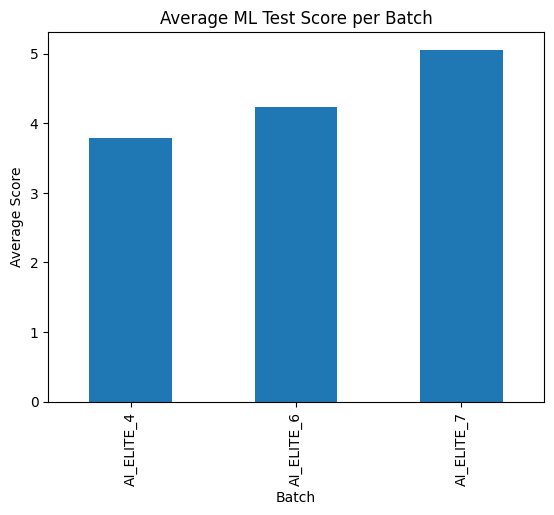

In [9]:
avg_scores.plot(kind="bar")
plt.xlabel("Batch")
plt.ylabel("Average Score")
plt.title("Average ML Test Score per Batch")
plt.show()

**Box Plot**

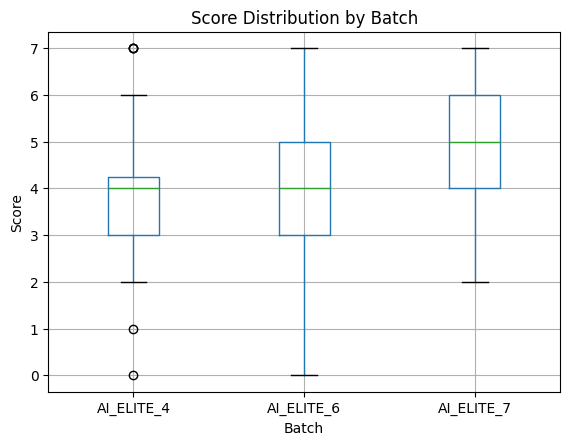

In [10]:
df.boxplot(column="Score", by="Batch")
plt.xlabel("Batch")
plt.ylabel("Score")
plt.title("Score Distribution by Batch")
plt.suptitle("")  
plt.show()

**Histogram**

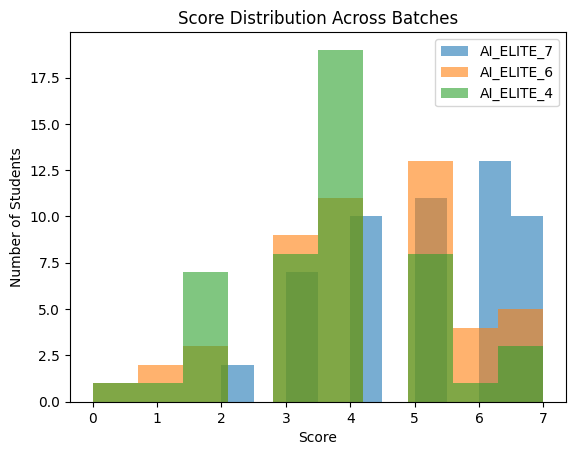

In [11]:
for batch in df["Batch"].unique():
    subset = df[df["Batch"] == batch]
    plt.hist(subset["Score"], alpha=0.6, label=batch)
plt.xlabel("Score")
plt.ylabel("Number of Students")
plt.title("Score Distribution Across Batches")
plt.legend()
plt.show()